In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyarrow as pa
import sys

from pathlib import Path

import pathhelper

In [3]:
print("Python: " + sys.version)
print("Pandas: " + pd.__version__)

Python: 3.11.10 | packaged by conda-forge | (main, Sep 30 2024, 18:08:57) [GCC 13.3.0]
Pandas: 2.2.3


In [86]:
out_dir = pathhelper.git_root(".") / "output"
data_dir = pathhelper.data_dir(".")
filename = data_dir / "pedestrians_cyclists/Trails_Counters_Pedestrians_Cyclists-hourly.feather"

out_dir.mkdir()

# Load data

In [87]:
hourly_df = pd.read_feather(filename)

# Dayofweek over hour

In [82]:
dow = "MTWRFSU"
# list(dow)[dayofweek]

How to generate a heatmap with marginal histograms:

https://how2matplotlib.com/generate-a-heatmap-in-matplotlib-using-a-scatter-dataset.html

In [31]:
summer_df = hourly_df[hourly_df["month"].isin( [6,7,8])]

In [36]:
day_hour_df = summer_df.groupby(["dayofweek", "hour"])["count"].sum().reset_index()

In [50]:
day_hour_df.dtypes

dayofweek      int32
hour           int64
count        float64
dtype: object

In [109]:
def calc_histogram_2D(df, ax1, ax2, ax_event="count"):
    max_ax1 = df[ax1].max()
    max_ax2 = df[ax2].max()
    
    hist = np.zeros((max_ax1+1, max_ax2+1))
    for index, row in df.iterrows():
        hist[int(row[ax1]), int(row[ax2])] = row[ax_event]
    return hist

hist = calc_histogram_2D(day_hour_df, "hour", "dayofweek")

#hist = np.zeros((24, 7))
#for index, row in day_hour_df.iterrows():
#    hist[int(row["hour"]), int(row["dayofweek"])] = row["count"]
xedges = [0, 23]
yedges = [0, 6]
x = np.sum(hist, axis=1)
y = np.sum(hist, axis=0)

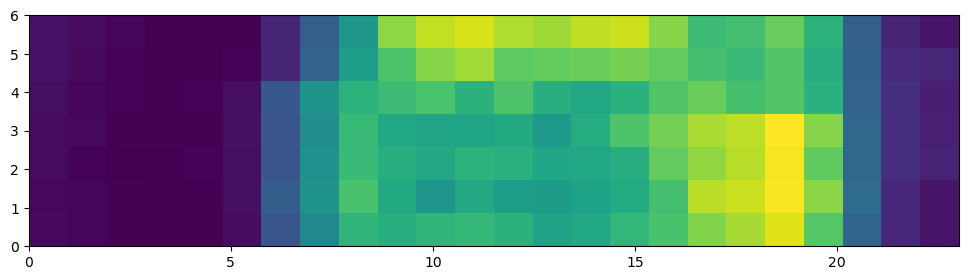

In [90]:
plt.figure(figsize=(12,3))
im = plt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], 
                    aspect='auto', cmap='viridis')

plt.savefig(out_dir / 'at_users-dayofweek_over_hour_bare.png')

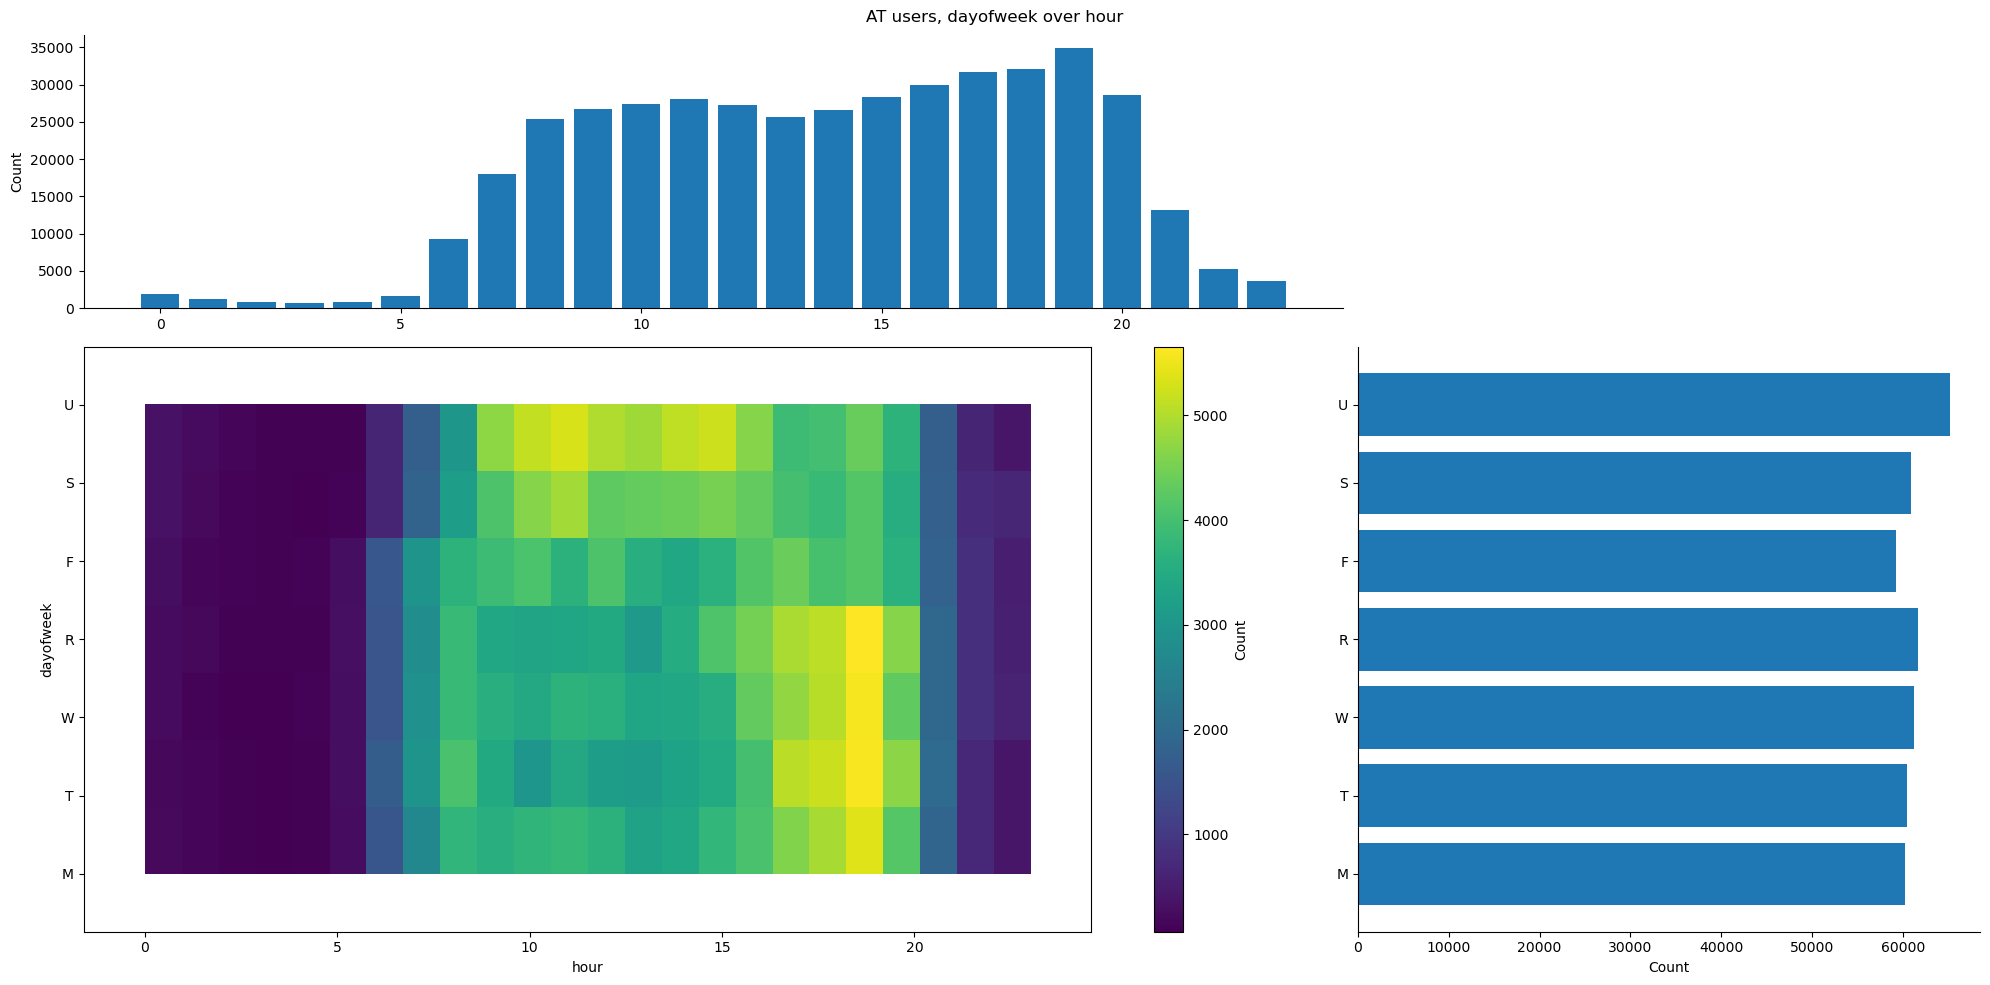

In [110]:

# Create the main figure and subplots
fig = plt.figure(figsize=(20, 10))
gs = fig.add_gridspec(3, 3)
ax_main = fig.add_subplot(gs[1:, :-1])
ax_right = fig.add_subplot(gs[1:, -1], sharey=ax_main)
ax_top = fig.add_subplot(gs[0, :-1], sharex=ax_main)

# Create the main heatmap
#hist, xedges, yedges = np.histogram2d(x, y, bins=20)
im = ax_main.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], 
                    aspect='auto', cmap='viridis')
fig.colorbar(im, ax=ax_main, label='Count')

# Create the marginal histograms
ax_right.barh([*range(7)], y, tick_label=list(dow))
ax_right.set_xlabel('Count')
ax_top.bar([*range(24)], x)
ax_top.set_ylabel('Count')

# Set labels and title
ax_main.set_xlabel('hour')
ax_main.set_ylabel('dayofweek')
fig.suptitle('AT users, dayofweek over hour')

# Remove top and right spines from marginal plots
ax_right.spines['top'].set_visible(False)
ax_right.spines['right'].set_visible(False)
ax_top.spines['top'].set_visible(False)
ax_top.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

fig.savefig(out_dir / 'at_users-dayofweek_over_hour.png')

# Week over hour

In [114]:
df = hourly_df[hourly_df["year"] == 2019]
week_hour_df = df.groupby(["week", "hour"])["count"].sum().reset_index()
hist = calc_histogram_2D(week_hour_df, "hour", "week")

xedges = [0, 23]
yedges = [0, 52]
x = np.sum(hist, axis=1)
y = np.sum(hist, axis=0)

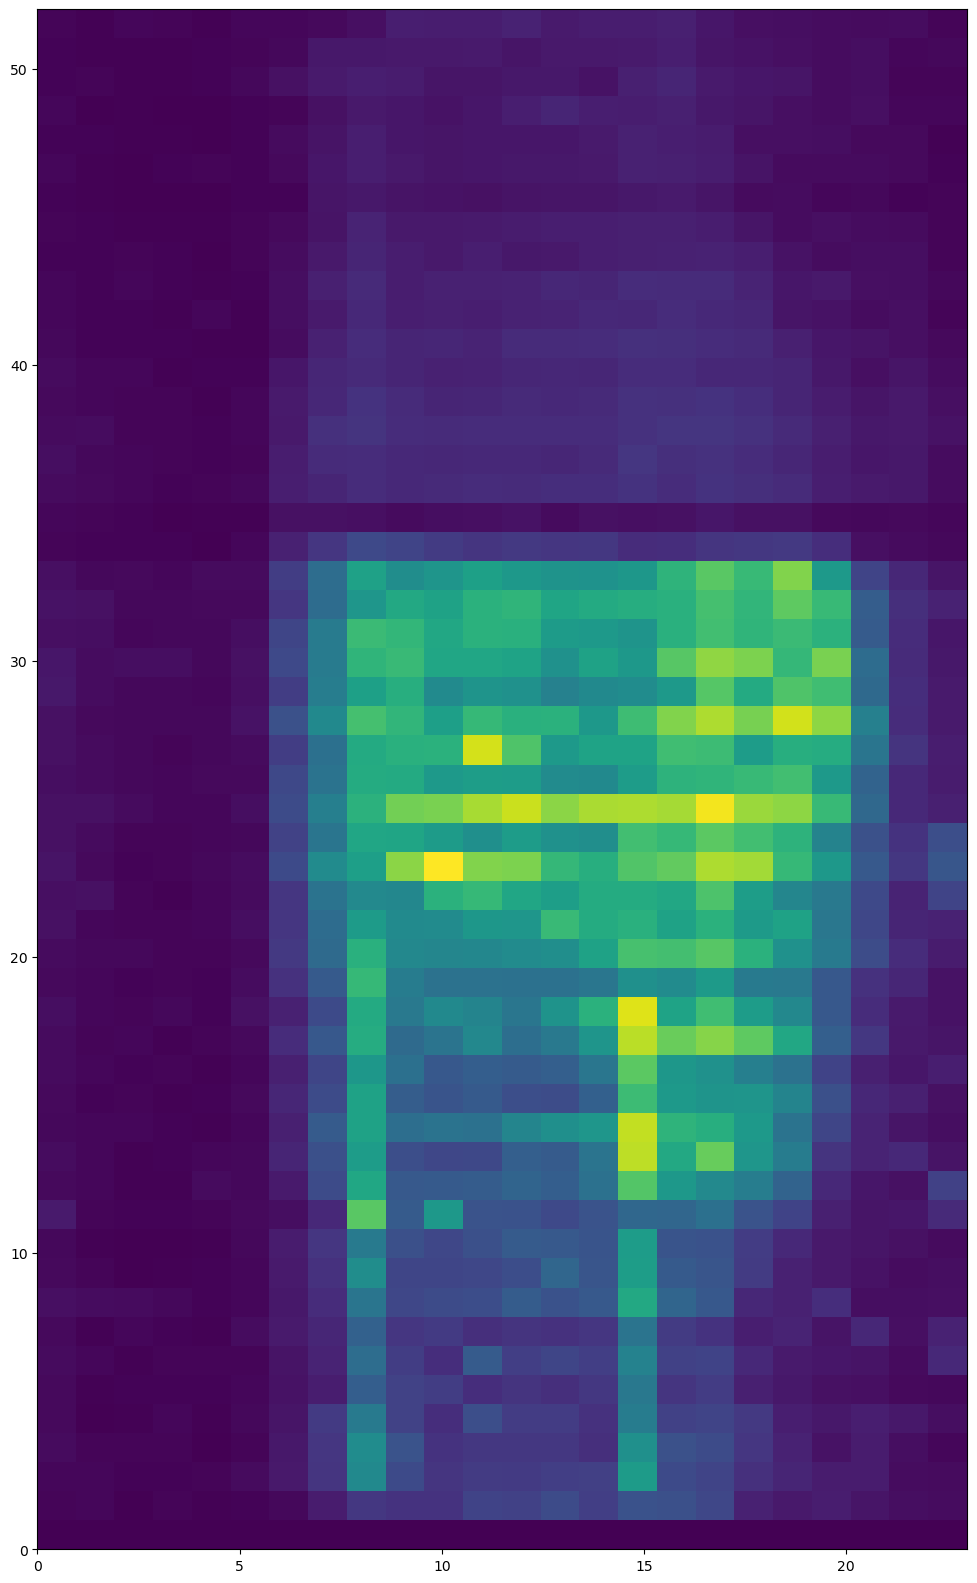

In [115]:
plt.figure(figsize=(12,20))
im = plt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], 
                    aspect='auto', cmap='viridis')

plt.savefig(out_dir / 'at_users-week_over_hour_bare.png')

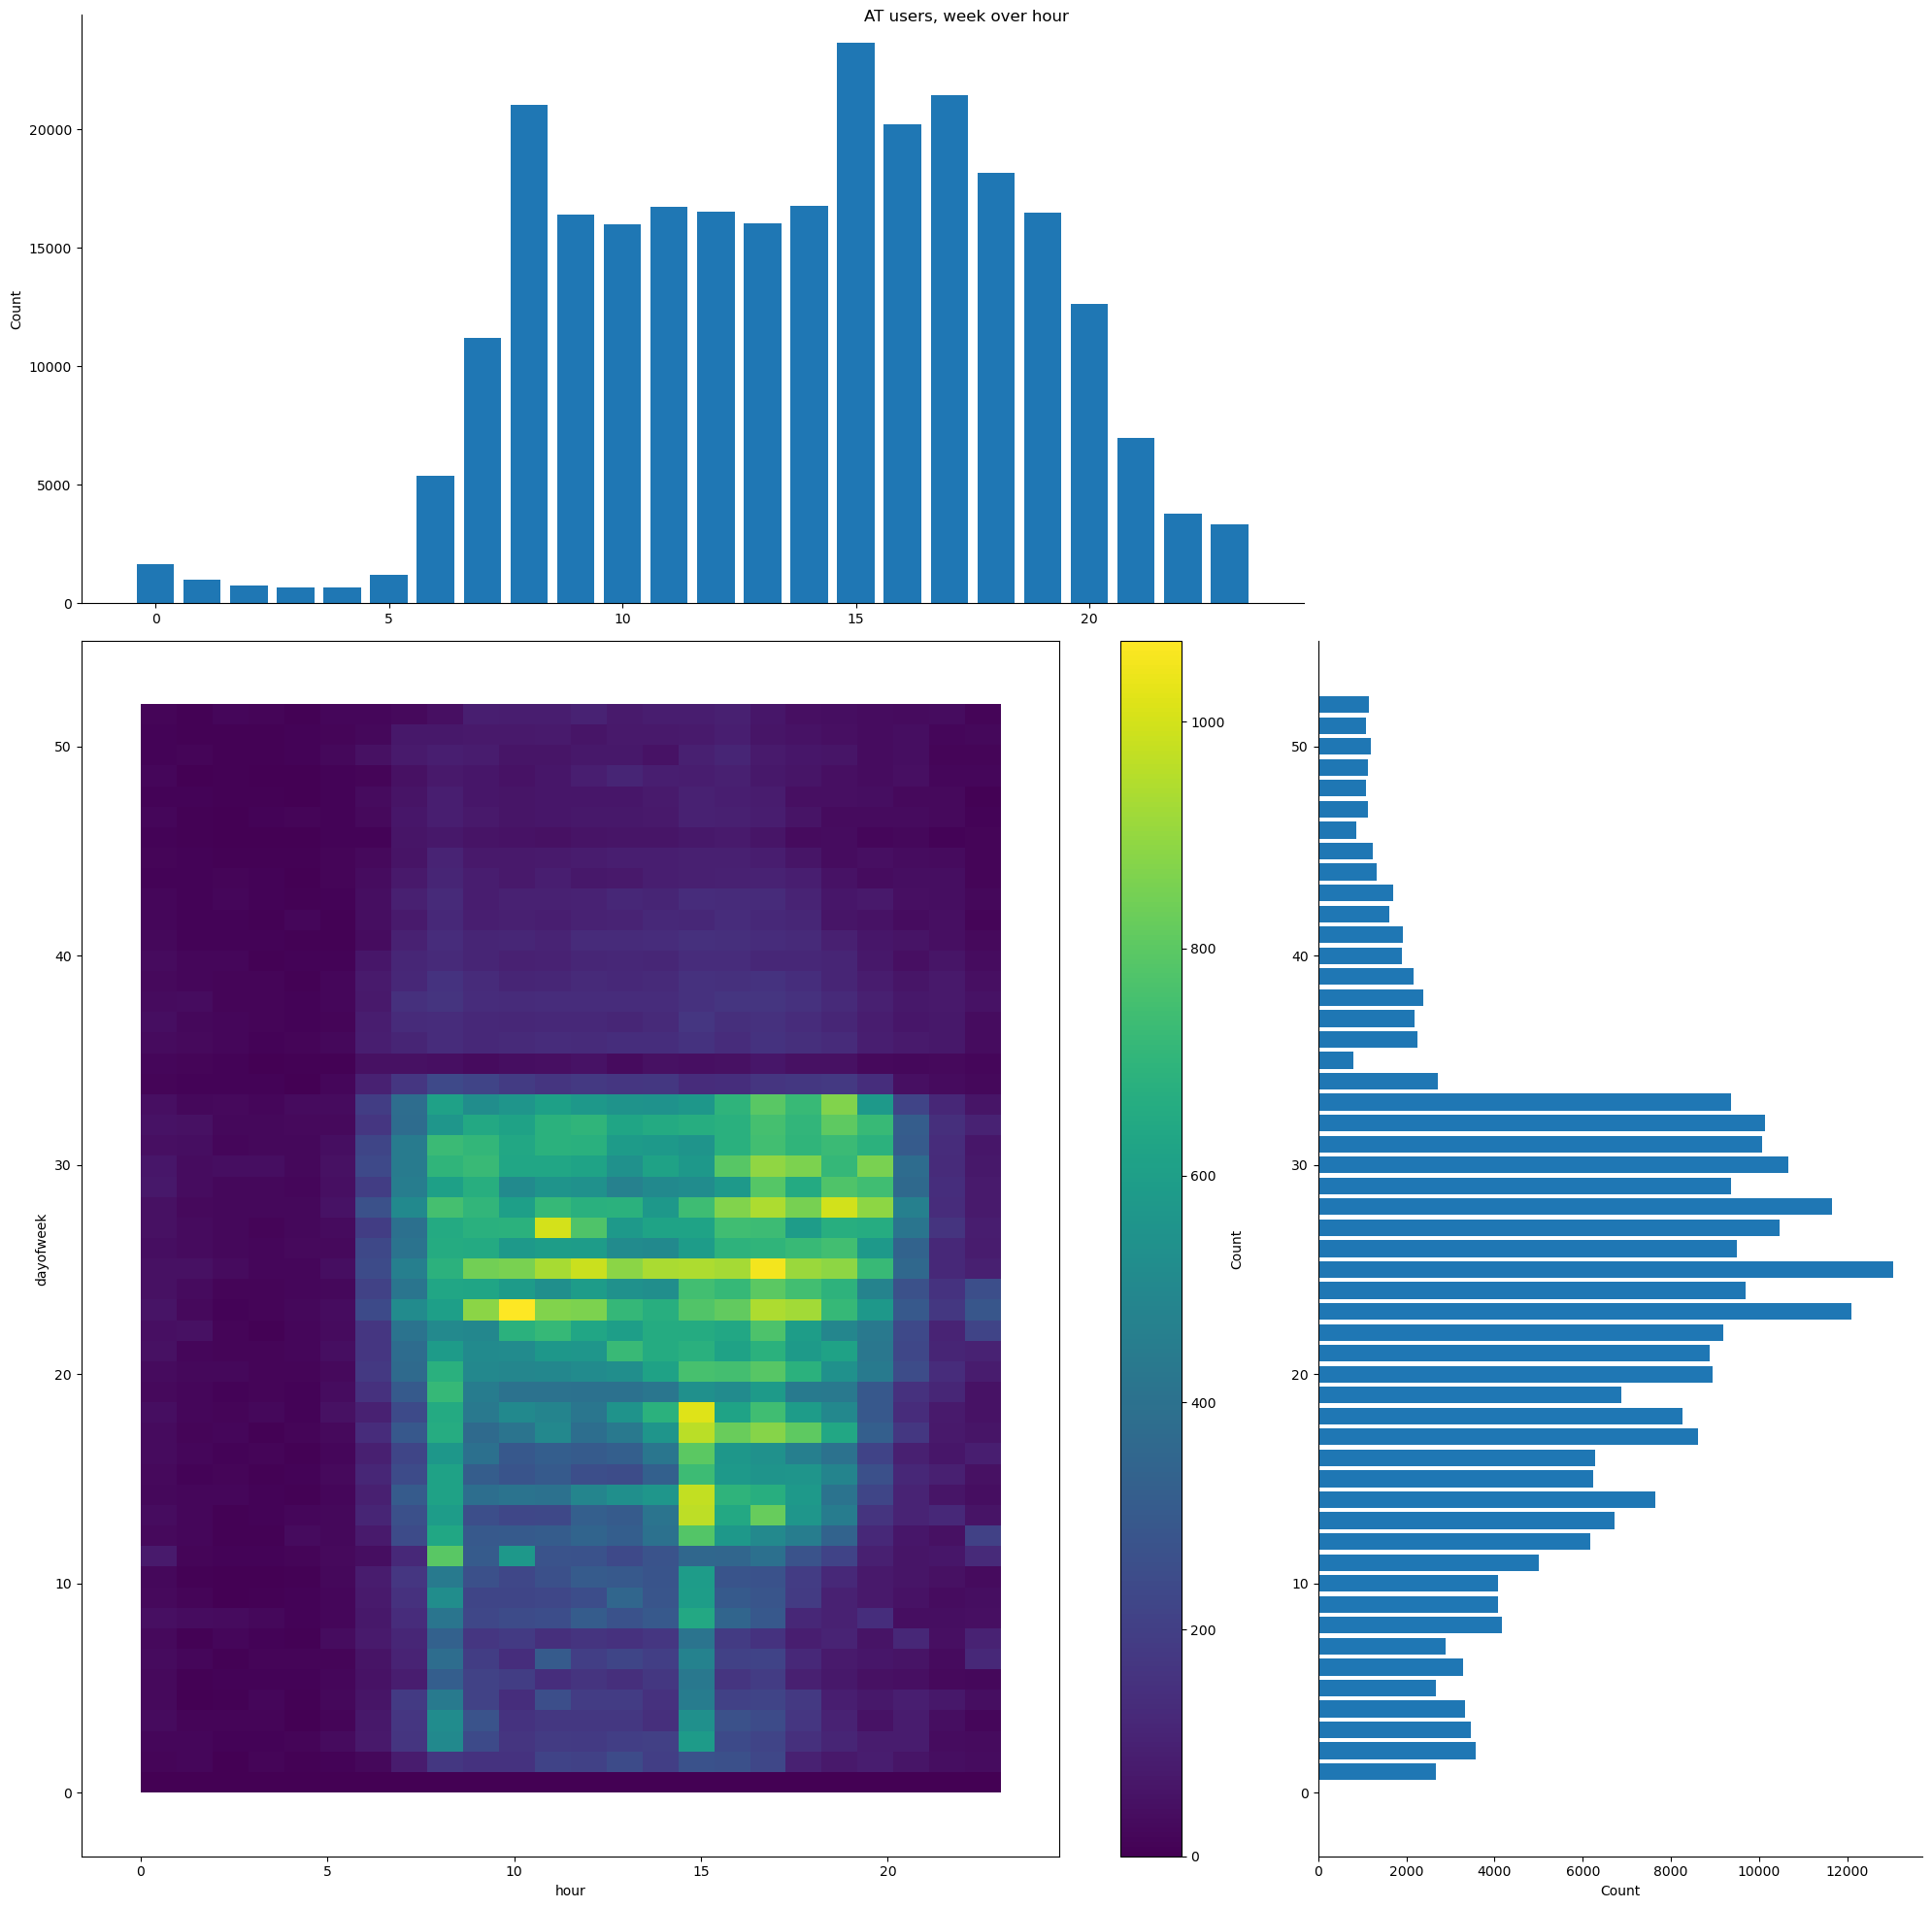

In [116]:
# Create the main figure and subplots
fig = plt.figure(figsize=(20, 20))
gs = fig.add_gridspec(3, 3)
ax_main = fig.add_subplot(gs[1:, :-1])
ax_right = fig.add_subplot(gs[1:, -1], sharey=ax_main)
ax_top = fig.add_subplot(gs[0, :-1], sharex=ax_main)

# Create the main heatmap
#hist, xedges, yedges = np.histogram2d(x, y, bins=20)
im = ax_main.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], 
                    aspect='auto', cmap='viridis')
fig.colorbar(im, ax=ax_main, label='Count')

# Create the marginal histograms
ax_right.barh([*range(53)], y)
ax_right.set_xlabel('Count')
ax_top.bar([*range(24)], x)
ax_top.set_ylabel('Count')

# Set labels and title
ax_main.set_xlabel('hour')
ax_main.set_ylabel('dayofweek')
fig.suptitle('AT users, week over hour')

# Remove top and right spines from marginal plots
ax_right.spines['top'].set_visible(False)
ax_right.spines['right'].set_visible(False)
ax_top.spines['top'].set_visible(False)
ax_top.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

fig.savefig(out_dir / 'at_users-week_over_hour.png')

# Cyclists Week over hour

In [112]:
hourly_df

,site_name,site_id,flow_id,flow_name,user_type,direction,year,month,day,hour,count,dayofweek,week
0,Budd Park,100064212,101064212,Channel 1 IN,Cyclist,IN,2018,1,1,0,0.0,0,1
1,Budd Park,100064212,101064212,Channel 1 IN,Cyclist,IN,2018,1,1,1,0.0,0,1
2,Budd Park,100064212,101064212,Channel 1 IN,Cyclist,IN,2018,1,1,2,0.0,0,1
3,Budd Park,100064212,101064212,Channel 1 IN,Cyclist,IN,2018,1,1,3,0.0,0,1
4,Budd Park,100064212,101064212,Channel 1 IN,Cyclist,IN,2018,1,1,4,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111499,Z - Temporary Radar 2,100041773,104041773,Channel 4 OUT,Cyclist,OUT,2022,12,31,19,0.0,5,52
3111500,Z - Temporary Radar 2,100041773,104041773,Channel 4 OUT,Cyclist,OUT,2022,12,31,20,0.0,5,52
3111501,Z - Temporary Radar 2,100041773,104041773,Channel 4 OUT,Cyclist,OUT,2022,12,31,21,0.0,5,52
3111502,Z - Temporary Radar 2,100041773,104041773,Channel 4 OUT,Cyclist,OUT,2022,12,31,22,0.0,5,52


In [118]:
df = hourly_df[hourly_df["user_type"] == "Cyclist"]
df = hourly_df[hourly_df["year"] == 2019]
week_hour_df = df.groupby(["week", "hour"])["count"].sum().reset_index()
hist = calc_histogram_2D(week_hour_df, "hour", "week")

xedges = [0, 23]
yedges = [0, 52]
x = np.sum(hist, axis=1)
y = np.sum(hist, axis=0)

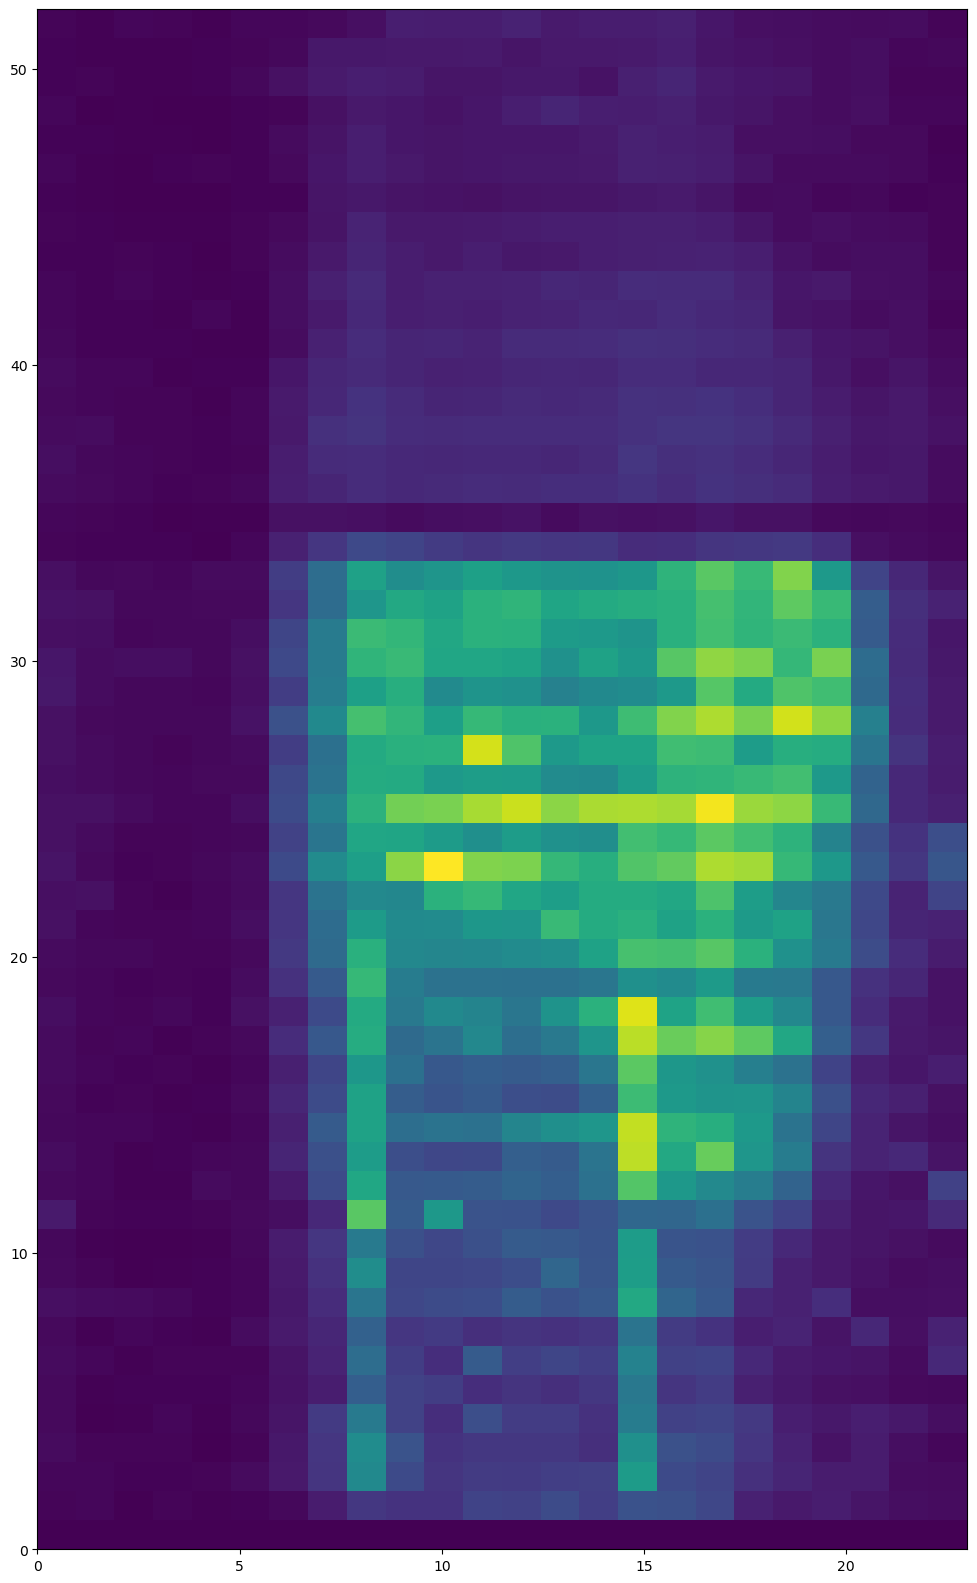

In [119]:
plt.figure(figsize=(12,20))
im = plt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], 
                    aspect='auto', cmap='viridis')

plt.savefig(out_dir / 'cyclists-week_over_hour_bare.png')

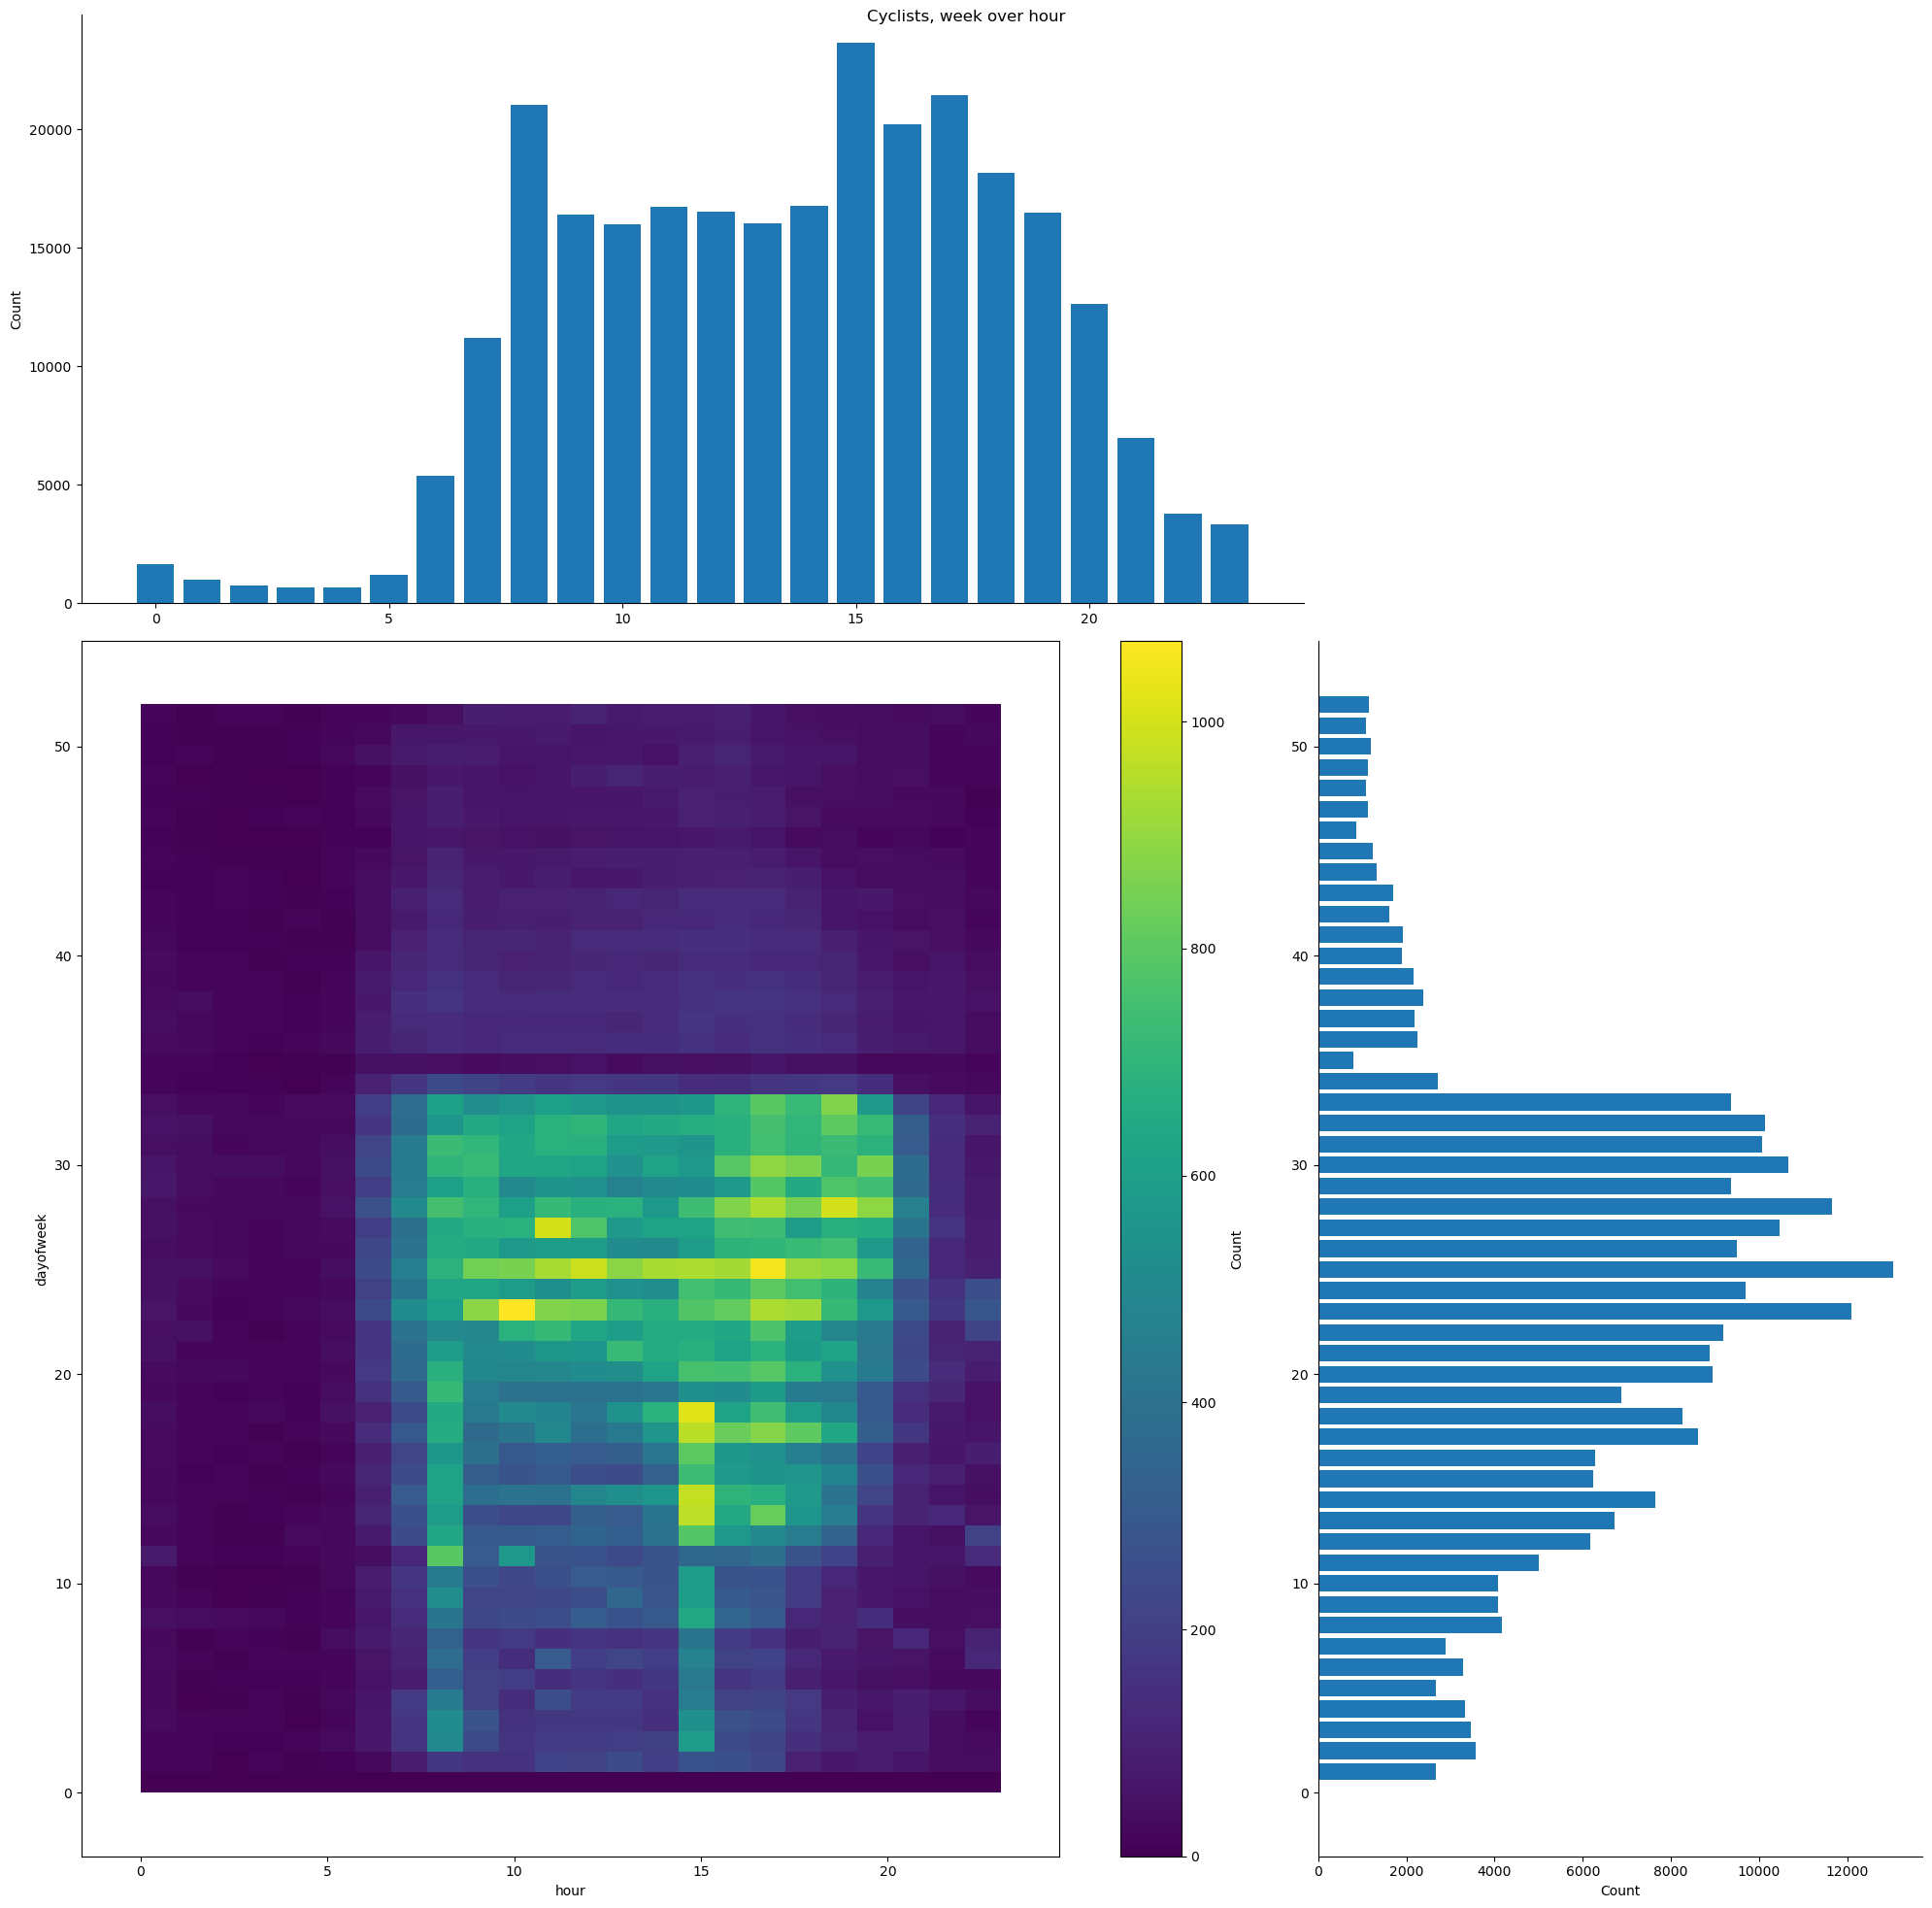

In [120]:
# Create the main figure and subplots
fig = plt.figure(figsize=(20, 20))
gs = fig.add_gridspec(3, 3)
ax_main = fig.add_subplot(gs[1:, :-1])
ax_right = fig.add_subplot(gs[1:, -1], sharey=ax_main)
ax_top = fig.add_subplot(gs[0, :-1], sharex=ax_main)

# Create the main heatmap
#hist, xedges, yedges = np.histogram2d(x, y, bins=20)
im = ax_main.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], 
                    aspect='auto', cmap='viridis')
fig.colorbar(im, ax=ax_main, label='Count')

# Create the marginal histograms
ax_right.barh([*range(53)], y)
ax_right.set_xlabel('Count')
ax_top.bar([*range(24)], x)
ax_top.set_ylabel('Count')

# Set labels and title
ax_main.set_xlabel('hour')
ax_main.set_ylabel('dayofweek')
fig.suptitle('Cyclists, week over hour')

# Remove top and right spines from marginal plots
ax_right.spines['top'].set_visible(False)
ax_right.spines['right'].set_visible(False)
ax_top.spines['top'].set_visible(False)
ax_top.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

fig.savefig(out_dir / 'cyclists-week_over_hour.png')